## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 통계
- 평가일 : 22.09.08
- 성명 : 최애림
- 점수 : 86

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
math = np.array(df['mathematics'])
math

array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82, 94, 75, 70, 77, 84, 84, 82,
       85, 90, 70, 78, 93, 77, 88, 82, 76, 87, 84, 77, 82, 91, 75, 76, 78,
       57, 89, 83, 69, 86, 81, 81, 80, 79, 87, 84, 71, 80, 77, 83, 88],
      dtype=int64)

In [3]:
# 평균값

np.mean(math)

78.88

In [4]:
# 중앙값

np.median(math)

80.0

In [9]:
# 최빈값

df['mathematics'].mode()[2]

84

In [8]:
df['mathematics'].value_counts()

84    4
82    4
77    4
76    3
81    3
80    3
78    3
70    2
88    2
83    2
87    2
75    2
63    2
91    1
86    1
79    1
89    1
57    1
69    1
65    1
93    1
90    1
85    1
94    1
66    1
60    1
71    1
Name: mathematics, dtype: int64

In [10]:
# 분산

np.var(math)

69.38560000000001

In [11]:
# 표준편차

np.std(math)

8.329801918413187

In [16]:
df['mathematics'].describe()

count    50.000000
mean     78.880000
std       8.414371
min      57.000000
25%      76.000000
50%      80.000000
75%      84.000000
max      94.000000
Name: mathematics, dtype: float64

In [14]:
# 범위

np.max(math) - np.min(math)

37

In [15]:
# IQR

np.percentile(math, 75) - np.percentile(math, 25)

8.0

Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [18]:
score = df.english
type(score)

pandas.core.series.Series

In [22]:
# 표준화
z = (score - np.mean(score)) / np.std(score)

# 5개 원소 출력
z[:5]

student number
1   -1.688430
2    1.094696
3   -0.245327
4   -1.791509
5   -0.142249
Name: english, dtype: float64

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

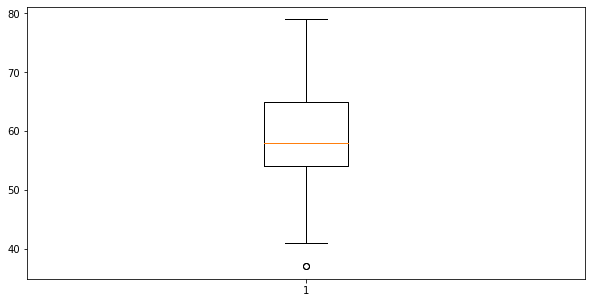

In [38]:
# 상자그림 시각화

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

plt.boxplot(score)
plt.show()

In [39]:
score

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
11    70
12    47
13    51
14    64
15    62
16    70
17    71
18    68
19    73
20    37
21    65
22    65
23    61
24    52
25    57
26    57
27    75
28    61
29    47
30    54
31    66
32    54
33    54
34    42
35    37
36    79
38    62
39    62
40    55
41    63
42    57
43    57
44    67
45    55
46    45
47    66
48    55
49    64
50    66
Name: english, dtype: int64

In [40]:
# 이상치 값 및 인덱스 출력
q1 = np.percentile(score, 25)
q3 = np.percentile(score, 75)

IQR = q3 - q1

outlier_down = q1 - 1.5 * IQR
outlier_up = q3 + 1.5 * IQR

print(outlier_down, outlier_up)

cnt = 0
for i in score:
    cnt += 1
    if i <= outlier_down or i >= outlier_up :
        print(f'index: {cnt}, 값: {i}')

37.5 81.5
index: 20, 값: 37
index: 35, 값: 37


In [41]:
# 이상치 삭제

score.drop([20,35], inplace = True)
score

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
11    70
12    47
13    51
14    64
15    62
16    70
17    71
18    68
19    73
21    65
22    65
23    61
24    52
25    57
26    57
27    75
28    61
29    47
30    54
31    66
32    54
33    54
34    42
36    79
38    62
39    62
40    55
41    63
42    57
43    57
44    67
45    55
46    45
47    66
48    55
49    64
50    66
Name: english, dtype: int64

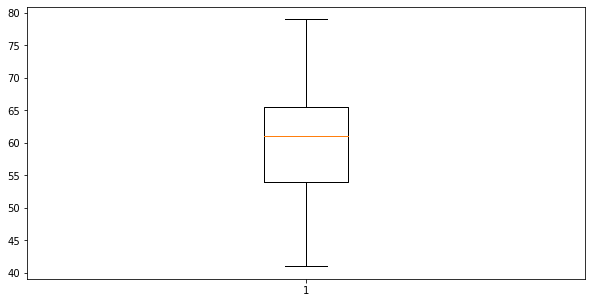

In [42]:
# 상자그림으로 시각화하여 이상치 제거 여부 재확인

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

plt.boxplot(score)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [33]:
import numpy as np
import pandas as pd
df = pd.read_csv('ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))

scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [45]:
# scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력

np.cov(scores_df['english'], scores_df['mathematics'])[0,1].round(2)

69.78

In [49]:
# scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력

np.corrcoef(scores_df['english'], scores_df['mathematics'])[0,1].round(2)

0.82

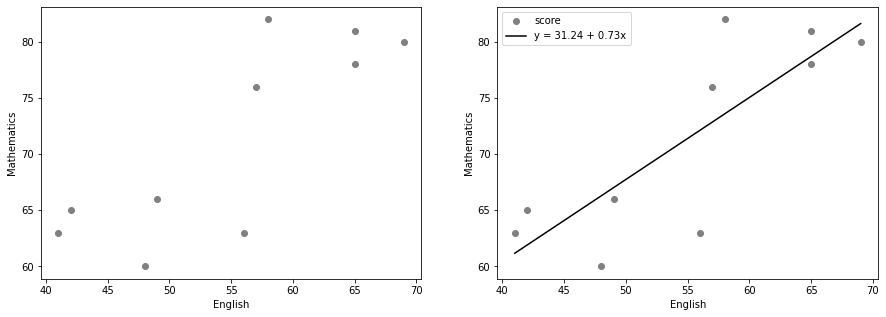

In [56]:
# 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력)

fig = plt.figure(figsize = (15,5))



## 회귀직선 미포함
ax1 = fig.add_subplot(121)
ax1.scatter(scores_df['english'], scores_df['mathematics'], color = 'gray', label = 'score')
ax1.set_xlabel('English')
ax1.set_ylabel('Mathematics')



## 회귀직선 포함
ax2 = fig.add_subplot(122)

poly_fit = np.polyfit(scores_df['english'], scores_df['mathematics'], 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(scores_df['english'].min(), scores_df['english'].max())
ys = poly_1d(xs)

ax2.scatter(scores_df['english'], scores_df['mathematics'], color = 'gray', label = 'score')
ax2.plot(xs, ys, color = 'black', label = f'y = {poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax2.set_xlabel('English')
ax2.set_ylabel('Mathematics')
ax2.legend(loc = 'upper left')

plt.show()

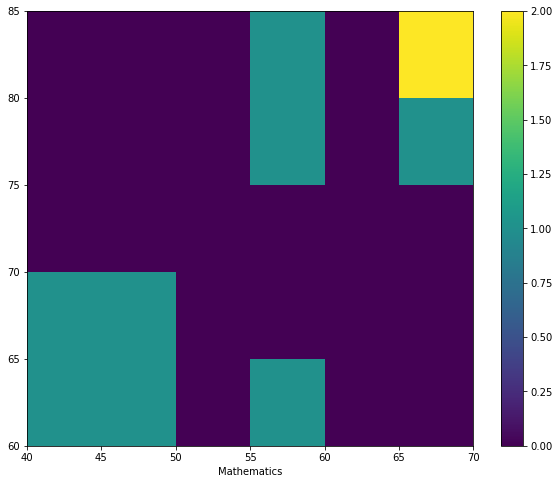

In [63]:
# 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(scores_df['english'], scores_df['mathematics'], bins = [6,5], range = [(40,70),(60,85)])

ax.set_xlabel('English')
ax.set_xlabel('Mathematics')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러바 표시
fig.colorbar(c[3])

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [64]:
df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [210]:
sample.min(), sample.max()

(57.5, 80.7)

<BarContainer object of 100 artists>

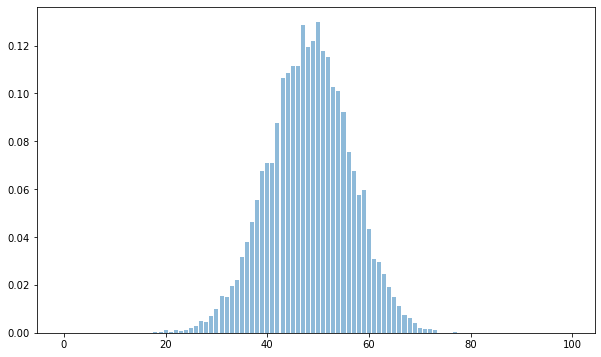

In [214]:
rvs = np.random.choice(scores, (10000, 20))
sample = np.mean(rvs, axis = 1)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

hist, _ = np.histogram(sample, bins = 100, range = (50,90), normed = True)
xs = np.arange(100)

ax.bar(xs, hist, alpha = 0.5, label = 'Sum of Bernoulli(0.3)' )

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [68]:
from scipy import stats

rv = stats.bernoulli(0.5)
rv.mean(), rv.var()

(0.5, 0.25)

Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [69]:
rv = stats.binom(10, 0.5)
rv.mean(), rv.var()

(5.0, 2.5)

Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [71]:
rv = stats.poisson(2)
rv.mean(), rv.var()

(2.0, 2.0)

Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

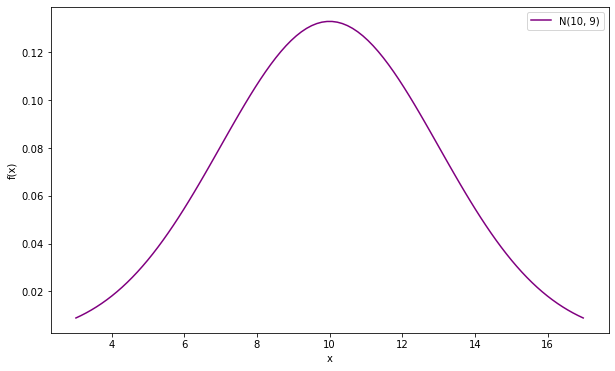

In [77]:
rv = stats.norm(10, 3)

xs = np.linspace(rv.isf(0.99), rv.isf(0.01), 100)
ys = rv.pdf(xs)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, ys, color = 'purple', label = f'N(10, 9)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.show()

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

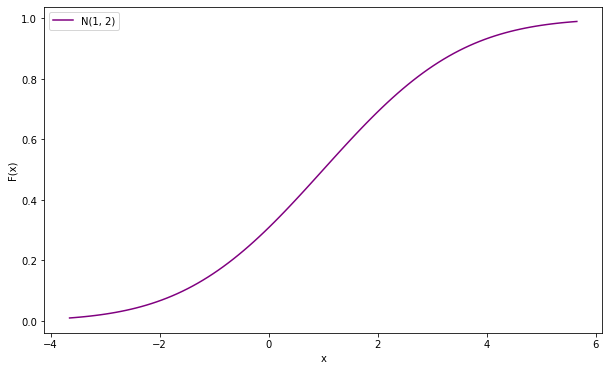

In [84]:
rv = stats.norm(1,2)

xs = np.linspace(rv.isf(0.99), rv.isf(0.01), 100)
ys2 = rv.cdf(xs)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, ys2, color = 'purple', label = f'N(1, 2)')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend()

plt.show()

Q11. "5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [223]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [224]:
# df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경

df2 = df1.copy()
df2['species'] = df2['species'].replace(['A', 'B'], ['C','D'], regex = True)
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [225]:
# df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경
df2.iloc[:3,1] = df2.iloc[:3,1] * 2
df2.iloc[3:,1]= df2.iloc[3:,1] * 3
df2

#df1과 df2를 행방향으로 결합-> df 생성
df = pd.merge(df1, df2, how = 'outer')
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
6,C,4
7,C,6
8,C,8
9,D,18


In [226]:
# df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

df.pivot_table(index = 'species', values = 'length', aggfunc = ['mean', 'std'])

,mean,std
,length,length
species,,
A,3,1
B,8,2
C,6,2
D,24,6


Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [227]:
import pandas as pd
shoes = pd.read_csv("5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [228]:
# 4행 3열을 복사 후 추가하여 8행 3열로 작성

shoes2 = shoes1.copy()
shoes = pd.concat([shoes1,shoes2]).reset_index().drop('index', axis = 1)
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
4,tokyo,blue,10
5,tokyo,red,15
6,osaka,blue,13
7,osaka,red,9


In [229]:
# 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')

df_o = pd.pivot_table(shoes, columns = 'color', index = 'store', values = 'sales', aggfunc = 'sum')
df_o

color,blue,red
store,,
osaka,26,18
tokyo,20,30


In [231]:
# 독립성 검정을 수행
## H0: 상점지점과 신발색에 따른 구매여부는 독립이다, H1: 상점지점과 신발색에 따른 구매여부는 독립이 아니다

chi, p, df, df_e = stats.chi2_contingency(df_o, correction = False)
print(f'카이제곱 검정계수: {chi:.2f}, p값: {p:.2f}','\n')
print(f'p값이 {p:.2f}으로 유의수준 0.05보다 크므로 귀무가설을 채택함. \n따라서, 상점지점과 신발색에 따른 구매여부는 독립임을 알 수 있다.')

카이제곱 검정계수: 3.41, p값: 0.06 

p값이 0.06으로 유의수준 0.05보다 크므로 귀무가설을 채택함. 
따라서, 상점지점과 신발색에 따른 구매여부는 독립임을 알 수 있다.


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [115]:
titanic = pd.read_csv('titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [118]:
# pivot_table을 만들기

tit_pv = pd.pivot_table(titanic, index = 'pclass', columns = 'sex', values = 'survived', aggfunc = 'mean')
tit_pv

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


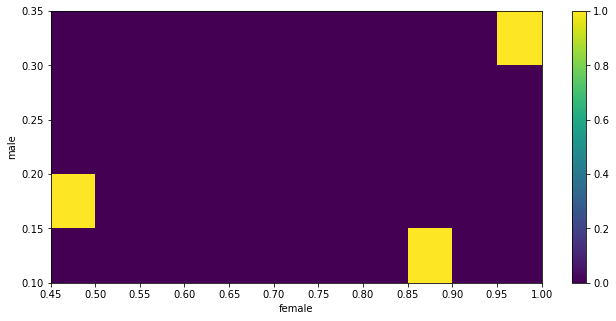

In [129]:
# 히트맵으로 시각화 및 인사이트를 기술

fig = plt.figure(figsize = (11,5))
ax = fig.add_subplot(111)

c = ax.hist2d(tit_pv['female'], tit_pv['male'], bins = [11,5], range = [(0.45,1.00),(0.10,0.35)])

ax.set_xlabel('female')
ax.set_ylabel('male')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러바 표시
fig.colorbar(c[3])

plt.show()

인사이트 기술: 여성들의 생존확률이 남성에 비해 높다

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [143]:
rv = stats.norm(4, 0.8)
arr = np.mean(rv.rvs((10000,10)), axis = 1)

arr[:10]

array([3.87839703, 4.28126915, 4.02109639, 3.97577349, 3.84064535,
       3.77929415, 3.91815033, 3.24198821, 3.94876504, 3.74350861])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

In [144]:
arr.min(), arr.max()

(3.0121905645161178, 4.985724529014033)

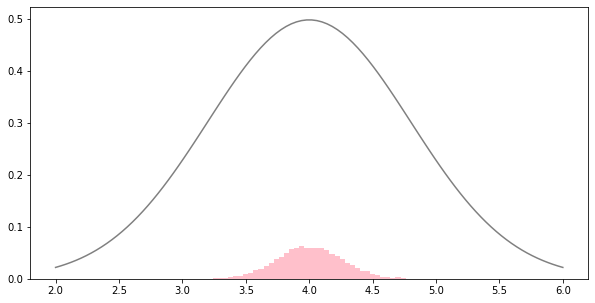

In [157]:
fig = plt.figure(figsize = (10,5))
ax =  fig.add_subplot(111)

# 히스토그램
weights = np.ones_like(arr)/len(arr) 
ax.hist(arr, bins = 100, range = (2.00, 6), weights = weights, color = 'pink')

# 확률밀도함수
xs = np.linspace(2.00, 6, 100)
ax.plot(xs, rv.pdf(xs), color = 'gray')

plt.show()

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

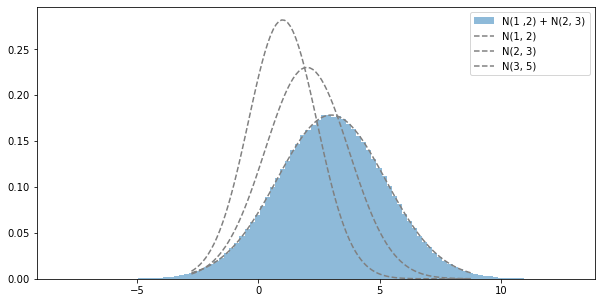

In [166]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))
rv3 = stats.norm(3, np.sqrt(5))

x_sample = rv1.rvs(int(1e6))
y_sample = rv2.rvs(int(1e6))
sum_sample = x_sample + y_sample


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

# X~N(1,2), Y~N(2,3)의 랜덤추출된 표본을 더한 표본들을 히스토그램화
ax.hist(sum_sample, bins = 100, density = True, alpha = 0.5, label = 'N(1 ,2) + N(2, 3)')


# N(1,2), N(2,3), N(3,5) 선 그래프
xs = np.linspace(rv3.isf(0.995), rv3.isf(0.005), 100)

ax.plot(xs, rv1.pdf(xs), label = 'N(1, 2)', ls = '--', color = 'gray')
ax.plot(xs, rv2.pdf(xs), label = 'N(2, 3)', ls = '--', color = 'gray')
ax.plot(xs, rv3.pdf(xs), label = 'N(3, 5)', ls = '--', color = 'gray')

ax.legend()
plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

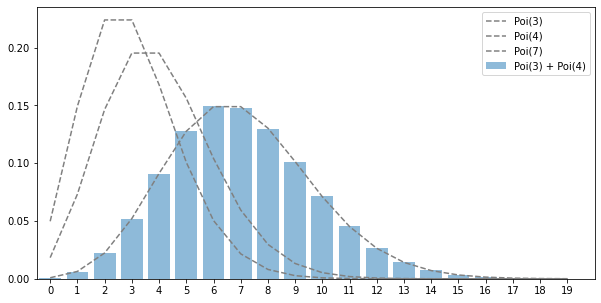

In [179]:
import warnings
warnings.filterwarnings('ignore')

rv1 = stats.poisson(3)
rv2 = stats.poisson(4)
rv3 = stats.poisson(7)

x_sample = rv1.rvs(int(1e6))
y_sample = rv2.rvs(int(1e6))
sum_sample = x_sample + y_sample

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

# 히스토그램
hist, _ = np.histogram(sum_sample, bins = 20, range = (0,20), normed = True)
ax.bar(xs, hist, alpha = 0.5, label = 'Poi(3) + Poi(4)')


# 선그래프
xs = np.arange(20)
ax.plot(xs, rv1.pmf(xs), label = 'Poi(3)', ls = '--', color = 'gray')
ax.plot(xs, rv2.pmf(xs), label = 'Poi(4)', ls = '--', color = 'gray')
ax.plot(xs, rv3.pmf(xs), label = 'Poi(7)', ls = '--', color = 'gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

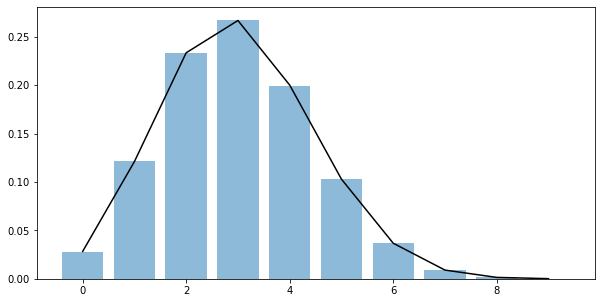

In [183]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

# 베르누이분포
p = 0.3
rv = stats.bernoulli(p)

xs_sample = rv.rvs((10,int(1e6)))
sum_sample = np.sum(xs_sample, axis = 0)

hist, _ = np.histogram(sum_sample, bins = 10, range = (0,10), normed = True)
xs = np.arange(10)
ax.bar(xs, hist, alpha = 0.5, label = 'Sum of Bernoulli(0.3)' )

# 이항분포
rv2 = stats.binom(10,p)
ax.plot(xs, rv2.pmf(xs), label = 'Binom', color = 'black')

plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

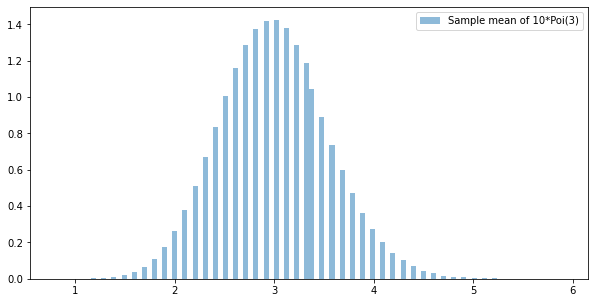

In [192]:
rv = stats.poisson(3)
rv2 = stats.norm(3,np.sqrt(3))

xs_sample = rv.rvs((10, int(1e6)))
sample_mean = np.mean(xs_sample, axis = 0)


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

# 포아송분포 표본평균의 히스토그램
ax.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = 'Sample mean of 10*Poi(3)')
ax.legend()

plt.show()

Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. 

In [195]:
df = pd.read_csv('ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [202]:
# H0: 감자의 무게 평균은 130KG이다. H1: 감자의 무게 평균은 130KG이 아니다.
weight = np.array(df['무게'])

w_mean = np.mean(weight)
w_var = np.var(weight, ddof = 1)

# t 검정통계량
t = (w_mean - 130) / np.sqrt(w_var/14)
print(f'T 검정통계량: {t:.2f}')

# 임곗값
rv = stats.t(13)
int = rv.interval(1-0.05)
print(f'임곗값: {int[0]:.2f}')

# p값
t, p = stats.ttest_1samp(weight, 130)
print(f'p값: {p:.2f}')

T 검정통계량: -1.46
임곗값: -2.16
p값: 0.17


표본으로 계산한 t검정통계량이 임곗값보다 작고, p값이 0.17로 유의수준 0.05보다 크다.
따라서, 귀무가설은 채택되고, 감자의 평균무게는 130kg이라고 볼 수 있다.